In [2]:
import pandas as pd
import ast

# Cargar el archivo credits.csv
credits_file_path = "C:\\Users\\yanin\\Downloads\\credits (1).csv"
df_credits = pd.read_csv(credits_file_path)

# Obtener información general del dataset
credits_info = df_credits.info()
credits_shape = df_credits.shape
credits_missing_values = df_credits.isnull().sum()

# Mostrar los resultados
credits_shape, credits_missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


((45476, 3),
 cast    0
 crew    0
 id      0
 dtype: int64)

In [4]:


# Convertir las columnas 'cast' y 'crew' de string a listas de diccionarios
df_credits['cast'] = df_credits['cast'].apply(ast.literal_eval)
df_credits['crew'] = df_credits['crew'].apply(ast.literal_eval)

# Extraer los nombres de los actores principales (los primeros 3 del elenco)
df_credits['main_actors'] = df_credits['cast'].apply(lambda x: [actor['name'] for actor in x[:3]])

# Extraer los nombres de los directores
df_credits['directors'] = df_credits['crew'].apply(lambda x: [member['name'] for member in x if member['job'] == 'Director'])

# Mostrar las primeras filas con la información extraída
df_credits[['main_actors', 'directors']].head(5)


,main_actors,directors
0,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter]
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston]
2,"[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch]
3,"[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker]
4,"[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer]


In [5]:
import pandas as pd

# Cargar el archivo CSV para revisar el contenido
file_path = "C:\\Users\\yanin\\Downloads\\credits (1).csv"
data = pd.read_csv(file_path)

# Mostrar las primeras filas y obtener información general sobre el archivo
data.head(), data.info(), data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


(                                                cast  \
 0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
 1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
 2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
 3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
 4  [{'cast_id': 1, 'character': 'George Banks', '...   
 
                                                 crew     id  
 0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
 1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
 2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
 3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
 4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862  ,
 None,
          cast   crew             id
 count   45476  45476   45476.000000
 unique  43019  44669            NaN
 top        []     []            NaN
 freq     2418    771            NaN
 mean      NaN    NaN  108345.997537
 std       NaN    NaN  112443.796536
 min       

In [6]:
import ast

# Función para convertir la columna 'cast' en una lista de nombres de actores
def extract_cast_names(cast_column):
    cast_list = []
    for row in cast_column:
        try:
            # Convertir la cadena JSON a una lista de diccionarios
            cast_data = ast.literal_eval(row)
            # Extraer el nombre de cada actor
            names = [actor.get("name", "") for actor in cast_data]
            cast_list.append(names)
        except (ValueError, SyntaxError):
            cast_list.append([])
    return cast_list

# Función para convertir la columna 'crew' en una lista de nombres y roles
def extract_crew_roles(crew_column):
    crew_list = []
    for row in crew_column:
        try:
            # Convertir la cadena JSON a una lista de diccionarios
            crew_data = ast.literal_eval(row)
            # Extraer el nombre y el rol de cada miembro
            roles = [(member.get("name", ""), member.get("job", "")) for member in crew_data]
            crew_list.append(roles)
        except (ValueError, SyntaxError):
            crew_list.append([])
    return crew_list

# Extraer nombres de actores y roles del equipo
data["cast_names"] = extract_cast_names(data["cast"])
data["crew_roles"] = extract_crew_roles(data["crew"])

# Mostrar las primeras filas de las nuevas columnas
data[["id", "cast_names", "crew_roles"]].head()


,id,cast_names,crew_roles
0,862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[(John Lasseter, Director), (Joss Whedon, Scre..."
1,8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[(Larry J. Franco, Executive Producer), (Jonat..."
2,15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[(Howard Deutch, Director), (Mark Steven Johns..."
3,31357,"[Whitney Houston, Angela Bassett, Loretta Devi...","[(Forest Whitaker, Director), (Ronald Bass, Sc..."
4,11862,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[(Alan Silvestri, Original Music Composer), (E..."


In [ ]:
# Calcular la cantidad de miembros del elenco y del equipo técnico para cada película
data["cast_count"] = data["cast_names"].apply(len)
data["crew_count"] = data["crew_roles"].apply(len)

# Identificar las películas con el mayor y menor número de miembros del elenco y del equipo
max_cast_movie = data.loc[data["cast_count"].idxmax()]
min_cast_movie = data.loc[data["cast_count"].idxmin()]

max_crew_movie = data.loc[data["crew_count"].idxmax()]
min_crew_movie = data.loc[data["crew_count"].idxmin()]

# Resultados
analysis_basic = {
    "max_cast": {
        "movie_id": max_cast_movie["id"],
        "cast_count": max_cast_movie["cast_count"]
    },
    "min_cast": {
        "movie_id": min_cast_movie["id"],
        "cast_count": min_cast_movie["cast_count"]
    },
    "max_crew": {
        "movie_id": max_crew_movie["id"],
        "crew_count": max_crew_movie["crew_count"]
    },
    "min_crew": {
        "movie_id": min_crew_movie["id"],
        "crew_count": min_crew_movie["crew_count"]
    }
}

# Mostrar resultados
analysis_basic


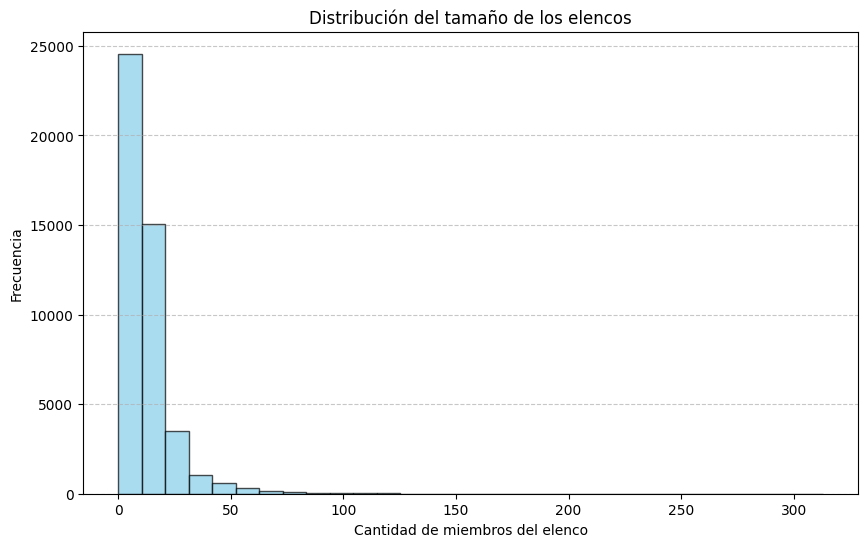

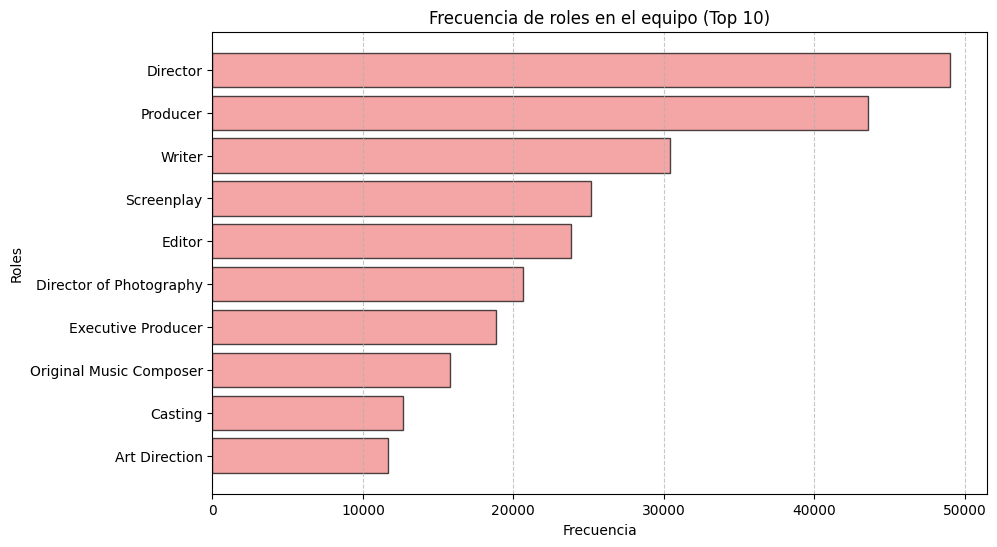

In [9]:
# Recalcular la cantidad de miembros del elenco y el equipo técnico
data["cast_count"] = data["cast_names"].apply(len)
data["crew_count"] = data["crew_roles"].apply(len)

# Crear el histograma para la distribución del tamaño de los elencos
plt.figure(figsize=(10, 6))
plt.hist(data["cast_count"], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribución del tamaño de los elencos")
plt.xlabel("Cantidad de miembros del elenco")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Calcular la frecuencia de los roles en el equipo técnico
from collections import Counter

# Descomponer la lista de tuplas en solo roles
all_roles = [role for crew in data["crew_roles"] for _, role in crew]

# Contar la frecuencia de los roles
role_counts = Counter(all_roles)

# Mostrar los 10 roles más comunes
top_roles = role_counts.most_common(10)

# Crear un gráfico de barras para los roles más comunes
roles, counts = zip(*top_roles)
plt.figure(figsize=(10, 6))
plt.barh(roles, counts, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title("Frecuencia de roles en el equipo (Top 10)")
plt.xlabel("Frecuencia")
plt.ylabel("Roles")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
# Extraer directores del equipo técnico
def extract_directors(crew_column):
    directors = [member[0] for member in crew_column if member[1] == "Director"]
    return directors

# Crear una nueva columna con los nombres de los directores
data["directors"] = data["crew_roles"].apply(extract_directors)

# Descomponer la lista de todos los directores en una sola lista
all_directors = [director for directors_list in data["directors"] for director in directors_list]

# Calcular la frecuencia de los directores
director_counts = Counter(all_directors)

# Obtener los 10 directores más frecuentes
top_directors = director_counts.most_common(10)

# Extraer el primer actor de cada película como actor principal
data["main_actor"] = data["cast_names"].apply(lambda x: x[0] if len(x) > 0 else None)

# Descomponer la lista de todos los actores principales
all_main_actors = [actor for actor in data["main_actor"] if actor]

# Calcular la frecuencia de los actores principales
actor_counts = Counter(all_main_actors)

# Obtener los 10 actores principales más frecuentes
top_actors = actor_counts.most_common(10)

# Mostrar resultados
top_directors, top_actors


In [10]:
import seaborn as sns

# Paso 1: Chequeo de nulos y valores faltantes
missing_values = data.isnull().sum()  # Contar valores nulos por columna
duplicate_count = data.duplicated().sum()  # Contar registros duplicados

# Paso 2: Tipos de datos
data_types = data.dtypes  # Identificar tipos de datos

# Paso 3: Estadísticas descriptivas
statistics_summary = data.describe(include="all")  # Resumen estadístico

# Paso 4: Matriz de correlación (solo aplicable a variables numéricas)
# Seleccionar solo columnas numéricas para calcular la correlación
correlation_matrix = data[["cast_count", "crew_count"]].corr()

# Visualización del mapa de calor de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

# Mostrar resultados generales
{
    "missing_values": missing_values.to_dict(),
    "duplicate_count": duplicate_count,
    "data_types": data_types.to_dict(),
    "statistics_summary": statistics_summary,
    "correlation_matrix": correlation_matrix.to_dict()
}


TypeError: unhashable type: 'list'